<a href="https://colab.research.google.com/github/program333/Traffic-Sign-Classification/blob/main/Trafic_Sign_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"devindrahirabatti","key":"2a2845b615ddf281c7166d6ce1f3b68c"}'}

In [4]:
# Next ,install the kaggle API client
!pip install -q kaggle

Installing kaggle api using pip

In [5]:
# The Kaggle API client expects this file to be in ~/.kaggle, sp move it there
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#This permissions change avoids a warning on kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

Setting up kaggle using kaggle API

In [6]:
# Creating directory and changing the current working directory
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset


/content/traffic_sign_dataset


To store the data we will create a new directory and make it as current working directory

In [7]:
# Searching for dataset
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34          83969        969  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11          10858        249  1.0              
eunjurho/german-traffic-sign-recognition-benchmark-cropped         german_traffic_sign_recognition_benchmark_cropped  206MB  2019-11-10 15:22:13            395          9  0.75             
ibrahimkaratas/gtsrb-german-traffic-sign-recogniti

In [8]:
#Downloading dataset and coming out of directory
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign 

100% 610M/612M [00:05<00:00, 249MB/s]
100% 612M/612M [00:05<00:00, 118MB/s]


In [9]:
#Unzipping downloaded file and removing unusable file
!unzip /content/traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm /content/traffic_sign_dataset/gtsrb-german-traffic-sign.zip
!rm -rf /content/traffic_sign_dataset/Meta
!rm -rf /content/traffic_sign_dataset/meta
!rm -rf /content/traffic_sign_dataset/test
!rm -rf /content/traffic_sign_dataset/train
!rm -rf /content/traffic_sign_dataset/Meta.csv

Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/train/5/00005_00053_00010.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign

In [10]:
#importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv2D, MaxPool2D



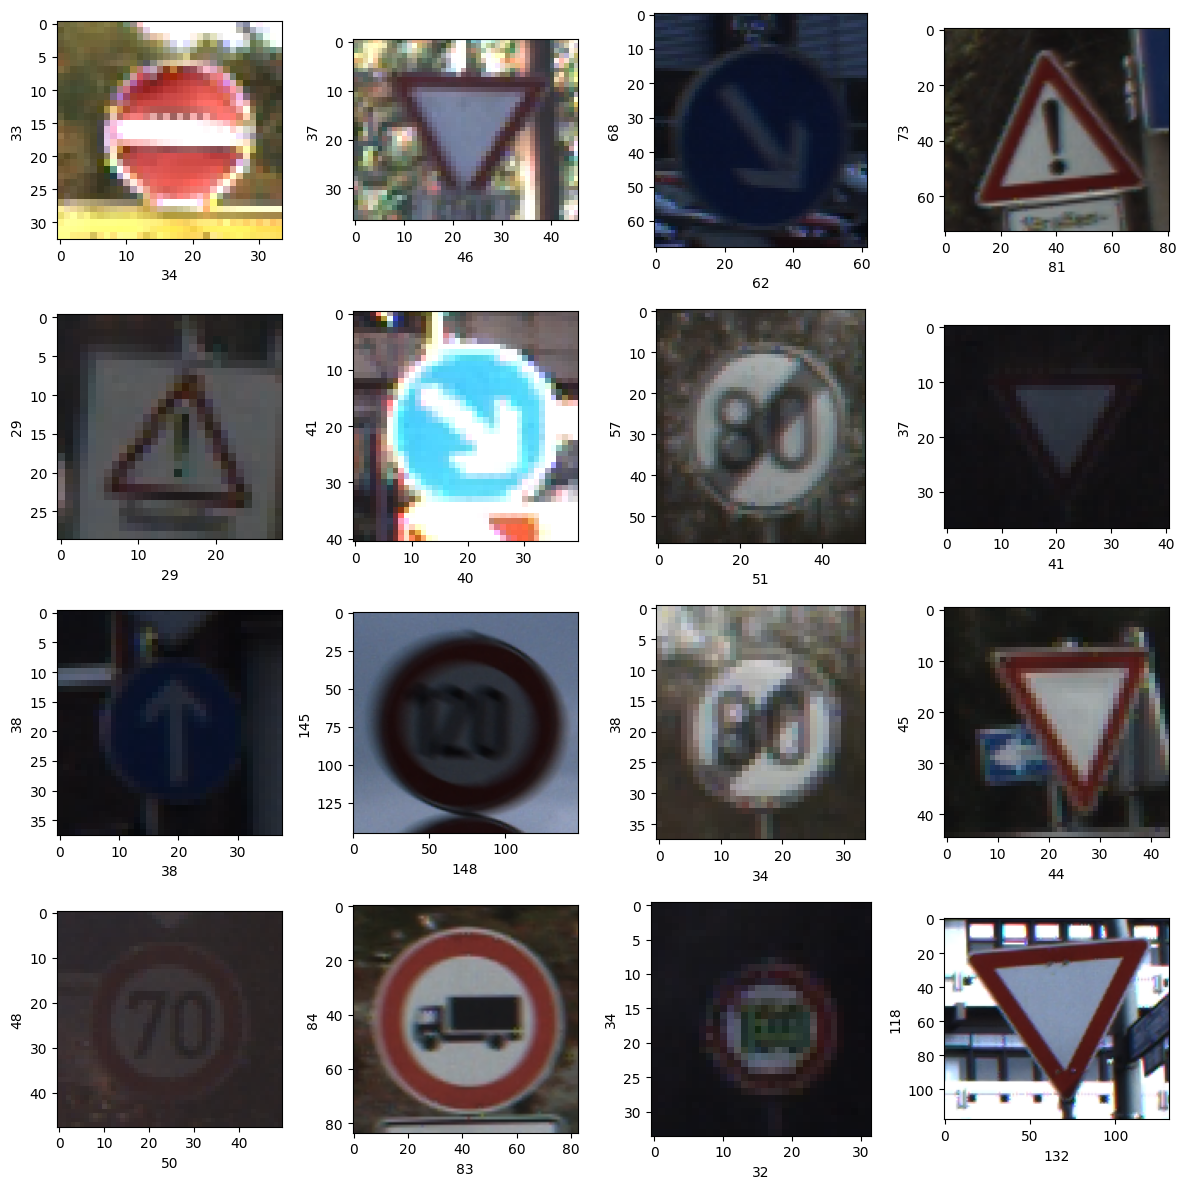

In [11]:
#Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "traffic_sign_dataset/Test"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img =imread(path+ '/'+ random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize=10) #Width of image
  plt.ylabel(rand_img.shape[0], fontsize=10) #height of image

Visualizing some images of traffic sifn from the dataset.we can see here that the dimension of images are uneven

In [12]:
# As size of images are different we have to make them equal so we will take mean of dimensions
dim1 = []
dim2 = []

for i in range(0,43):
  labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
  image_path = os.listdir(labels)
  for x in image_path:
    img = imread(labels+ '/'+x)
    dim1.append(img.shape[0])
    dim2.append(img.shape[1])

For further processing we will require the images of same dimension. So ,we will storing the dimension of all the images from training dataset from all 43 classes

In [13]:
#Printing mean dimension of images
print("Dimension 1 Mean: ",np.mean(dim1), "Dimension 2 Mean: ", np.mean(dim2))

Dimension 1 Mean:  50.328929582493814 Dimension 2 Mean:  50.83587951745773


Now we will find out the mean value of both the dimensions and analyse them. Here, we can see that (50,50) is the average shape for all the images

In [14]:

images = []
label_id = []

for i in range(43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)  # Open image
        img = img.resize((50, 50))
        img = np.array(img)
        images.append(img)
        label_id.append(i)



Now we will reshape the images into (50,50) and also their labels id

In [15]:

# Converting images into NumPy array
images = np.array(images)

# The pixel value of each image ranges between 0 and 255
# Dividing each image by 255 will scale the values between 0 and 1. This is known as normalization.
images = images / 255

Now we will convert all the images into numpy array and normalize them

In [16]:
label_id = np.array(label_id)
label_id.shape

(39209,)

Storing the label ids into numpy array and printing the shape.here we can observe that their are 39209 label ids

In [17]:
images.shape

(39209, 50, 50, 3)

In [18]:
#Visualize the number of classes count
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

2     2250
1     2220
13    2160
12    2100
38    2070
dtype: int64

In [19]:
# Splitting the data
x_train, x_val, y_train, y_val = train_test_split(images, label_id, test_size = 0.3, random_state = 42)

The next step would be to split the data into training anjnd validation with 8-% of training data and 20% of validation data

In [20]:
# Keras has a built in function for one-hot encoding
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)


Converting the classes column into categorical using to_categorical() function

In [21]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same')) #Hyper Parameterization
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size  =(3,3), activation  ='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(43,activation = 'softmax'))


Defining the model architecture.In this we will define all the layers with their input shape kernel size, activation etc

In [22]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

Compiling the model using metrics, optimizer and loss as required and printing out the summary of the model

In [23]:
model.fit(x_train,y_train, epochs =10, batch_size=128, validation_data =(x_val, y_val), verbose  = 2)

Epoch 1/10
215/215 - 19s - loss: 2.5846 - accuracy: 0.2929 - val_loss: 1.4811 - val_accuracy: 0.6104 - 19s/epoch - 88ms/step
Epoch 2/10
215/215 - 4s - loss: 1.3324 - accuracy: 0.5817 - val_loss: 0.6590 - val_accuracy: 0.8564 - 4s/epoch - 19ms/step
Epoch 3/10
215/215 - 4s - loss: 0.8395 - accuracy: 0.7311 - val_loss: 0.3520 - val_accuracy: 0.9358 - 4s/epoch - 19ms/step
Epoch 4/10
215/215 - 4s - loss: 0.6401 - accuracy: 0.7947 - val_loss: 0.2300 - val_accuracy: 0.9611 - 4s/epoch - 19ms/step
Epoch 5/10
215/215 - 4s - loss: 0.5250 - accuracy: 0.8291 - val_loss: 0.1586 - val_accuracy: 0.9674 - 4s/epoch - 19ms/step
Epoch 6/10
215/215 - 4s - loss: 0.4577 - accuracy: 0.8487 - val_loss: 0.1353 - val_accuracy: 0.9748 - 4s/epoch - 19ms/step
Epoch 7/10
215/215 - 4s - loss: 0.4082 - accuracy: 0.8658 - val_loss: 0.1100 - val_accuracy: 0.9782 - 4s/epoch - 19ms/step
Epoch 8/10
215/215 - 4s - loss: 0.3712 - accuracy: 0.8778 - val_loss: 0.0897 - val_accuracy: 0.9834 - 4s/epoch - 19ms/step
Epoch 9/10
215

Now we will fit the model and observe how our model is getting trained on each epoch

<Axes: >

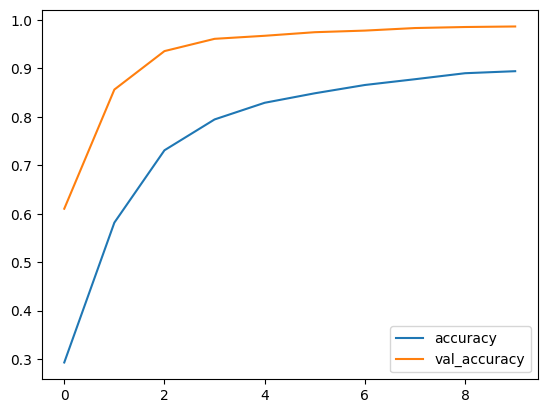

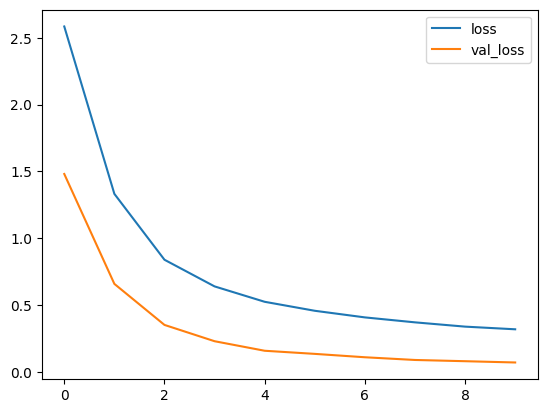

In [24]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss','val_loss']].plot()

Now we will visualize the accuracy and loss per epoch.For this we will store the model history int the pandas dataframe and plot them

In [25]:
test_path = 'traffic_sign_dataset/Test'
!rm traffic_sign_dataset/Test/GT-final_test.csv

Creating the variables which has path of test dataset. As we downloaded the dataset we found out their is a GT-final_test.csv file in the test images folder which cannot be processed. So we will remove that file

In [26]:
#defining a function that will scale images
from PIL import Image

def scaling(test_images, test_path):
  images = []
  image_path  = test_images

  for x in image_path:
    img = Image.open(test_path + '/' + x)
    img = img.resize((50,50))
    img = np.array(img)
    images.append(img)

  # Converting images into NumPy array
  images = np.array(images)

  # The pixel value of each image ranges between 0 and 255
  # Dividing each image by 255 will scale the values between 0 and 1. This is known as normalization.
  images = images / 255

  return images

Next step would we creating a function to resize the test images converting them into a numpy array and normalize them

In [27]:
test_images = scaling(sorted(os.listdir(test_path)),test_path)

calling the above created function on test images

In [61]:
test = pd.read_csv('traffic_sign_dataset/Test.csv')
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

Nezt we will read label ids from Test.csv and store the values of the class id in y_test variable

In [58]:
y_pred = model.predict(test_images);
y_pred = np.argmax(y_pred, axis=1)
y_pred

395/395 [==============================] - 1s 2ms/step


array([16,  1, 38, ..., 32,  7, 10])

Now we will use the model to make predictions on our images and save them in y_pred

In [55]:
# Label Overview
all_labels = ['Speed limit (20km/h)',
            'Speed limit (30km/h)', 
            'Speed limit (50km/h)', 
            'Speed limit (60km/h)', 
            'Speed limit (70km/h)', 
            'Speed limit (80km/h)', 
            'End of speed limit (80km/h)', 
            'Speed limit (100km/h)', 
            'Speed limit (120km/h)', 
            'No passing', 
            'No passing veh over 3.5 tons', 
            'Right-of-way at intersection', 
            'Priority road', 
            'Yield', 
            'Stop', 
            'No vehicles', 
            'Veh > 3.5 tons prohibited', 
            'No entry', 
            'General caution', 
            'Dangerous curve left', 
            'Dangerous curve right', 
            'Double curve', 
            'Bumpy road', 
            'Slippery road', 
            'Road narrows on the right', 
            'Road work', 
            'Traffic signals', 
            'Pedestrians', 
            'Children crossing', 
            'Bicycles crossing', 
            'Beware of ice/snow',
            'Wild animals crossing', 
            'End speed + passing limits', 
            'Turn right ahead', 
            'Turn left ahead', 
            'Ahead only', 
            'Go straight or right', 
            'Go straight or left', 
            'Keep right', 
            'Keep left', 
            'Roundabout mandatory', 
            'End of no passing', 
            'End no passing veh > 3.5 tons' ]

Storing the labels according to the image classes

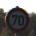

In [100]:
#Visualize the test image
img = Image.open(test_path + '/00141.png')
img

Let's visualize the test image.
Finding out original label for the image above

Finding out predicted label for the image above

In [101]:
import cv2
import numpy as np

# Load and preprocess the image
image = cv2.imread(test_path + '/00141.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB color space
image = cv2.resize(image, (50, 50))  # Resize the image to the input shape expected by the model
image = image / 255.0  # Normalize pixel values (assuming range 0-255)

# Prepare the image for prediction
input_image = np.expand_dims(image, axis=0)  # Add an extra dimension to represent the batch

# Pass the image to the model for prediction
predictions = model.predict(input_image)

# Process the predictions
predicted_labels = np.argmax(predictions, axis=1)


1/1 [==============================] - 0s 21ms/step


In [102]:
# Map predicted labels to their corresponding names
predicted_label_names = [all_labels[label] for label in predicted_labels]

# Print the predicted label names
print(predicted_label_names)


['Speed limit (70km/h)']
